# Worley noise:

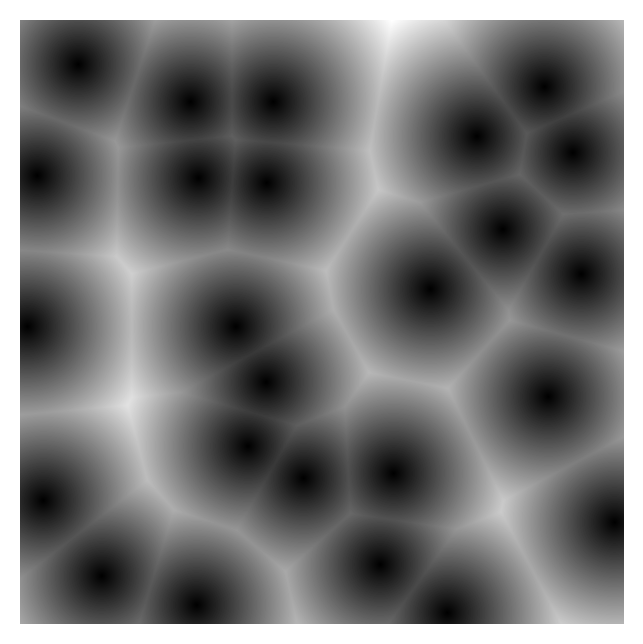

array([[0.073, 0.096],
       [0.257, 0.028],
       [0.507, 0.012],
       [0.795, 0.038],
       [0.92 , 0.135],
       [0.135, 0.282],
       [0.261, 0.295],
       [0.507, 0.357],
       [0.705, 0.377],
       [0.968, 0.292],
       [0.135, 0.419],
       [0.269, 0.408],
       [0.599, 0.407],
       [0.758, 0.469],
       [0.901, 0.596],
       [0.192, 0.756],
       [0.346, 0.799],
       [0.445, 0.679],
       [0.75 , 0.618],
       [0.981, 0.707],
       [0.11 , 0.868],
       [0.219, 0.915],
       [0.42 , 0.929],
       [0.623, 0.874],
       [0.831, 0.984]])

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
pixels = 1000
num_feature_points = 25
x, y = np.mgrid[0:pixels, 0:pixels] / pixels
z = np.ones((pixels, pixels))

# np.random.seed(3)
# we will start with 4 random points (also known as feature points)
# not quite sure yet how to randomise... maybe there is a better method...?
# look at methods to better randomise...
'''feature_points = np.array([[0., 0.],
    [0.2, 0.4],
    [0.6, 0.2],
    [0.8, 0.6]])'''

# we will use some kind of box randomiser (not quite sure what the name is so I gave it one myself)
# we will create a grid within the frame and each feature point is put inside each grid - its position within the grid is completely random
# note that because of this, it is desirable to have square number of feature points
# we have chosen this method of randomisation since we do not want any feature point being too close to another feature point

# num_of_grids is the number of boxes in each axis
num_of_grids = int(num_feature_points**(1/2))

# step is the number of pixels between each grid point
step = int(pixels / num_of_grids)
a = np.array([step * x for x in range(num_of_grids)])
grid_feature_points_x = np.random.randint([a for i in range(num_of_grids)], [a + int(pixels/num_of_grids) for i in range(num_of_grids)]) / pixels
grid_feature_points_y = (np.random.randint([a for i in range(num_of_grids)], [a + int(pixels/num_of_grids) for i in range(num_of_grids)]) / pixels).T
grid_feature_points_x = grid_feature_points_x.reshape(num_of_grids**2, 1)
grid_feature_points_y = grid_feature_points_y.reshape(num_of_grids**2, 1)
grid_feature_points = np.concatenate((grid_feature_points_x, grid_feature_points_y), axis = 1)

# the leftover points can go wherever they want - completely randomised
# preferably, we'd want no leftover points since it could result in feature points being too close together.
num_leftover_points = num_feature_points - num_of_grids**2
leftover_feature_points = np.random.randint(pixels, size = (num_leftover_points, 2)) / pixels

#feature_points include all the feature points
feature_points = np.concatenate((grid_feature_points, leftover_feature_points))

# going through each point, calculating the closest feature point to each point and noting that distance.
for feature_point in feature_points:
    # could define a function that finds the euclidean distance between all the coordinates and the feature point...?
    z = np.fmin(((x - feature_point[0])**2 + (y - feature_point[1])**2)**(1/2), z)
    # what if I use the second closest feature point?

plt.figure(dpi = 200)
plt.imshow(z, cmap = 'gray') # binary, gray
# plt.scatter(feature_points[:, 1] * pixels, feature_points[:, 0] * pixels, linewidths = 1)

plt.axis('off')
plt.show()

'''
fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.set_facecolor('beige')
ax.axis('off')
ax.plot_surface(x, y, z)
'''
feature_points



# Voronoi diagrams... pencil crayons...

things to consider:
- each crayon has to be flat
- get different heights for each crayon
- we need to get a dot (the graphite of the pencil)
- each crayon is a different colour

- https://www.reddit.com/r/proceduralgeneration/comments/rzt0j4/pencil_crayons/
